This notebook takes the first look at data and tries some straightforward clustering technqiues, which are probably by themselves too naive for this problem. 

### Data visualization

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from trackml.dataset import load_event
import seaborn as sns
%matplotlib inline
%matplotlib nbagg

In [2]:
path_to_data=os.environ["DATA"]
hits, cells, particles, truth = load_event(path_to_data+'/event000001000')
print(hits.shape,cells.shape,particles.shape,truth.shape) #only hits and cells are available at test time

(120939, 7) (664996, 4) (12263, 9) (120939, 9)


In [4]:
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-64.409897,-7.163700,-1502.5,7,2,1
1,2,-55.336102,0.635342,-1502.5,7,2,1
2,3,-83.830498,-1.143010,-1502.5,7,2,1
3,4,-96.109100,-8.241030,-1502.5,7,2,1
4,5,-62.673599,-9.371200,-1502.5,7,2,1


In [5]:
hits.describe()

,hit_id,x,y,z,volume_id,layer_id,module_id
count,120939.00000,120939.000000,120939.000000,120939.000000,120939.000000,120939.000000,120939.000000
mean,60470.00000,-1.769455,4.751039,-2.315056,10.921564,5.918389,371.969117
std,34912.22644,305.715118,305.173096,1061.912476,3.365705,3.407428,529.032206
min,1.00000,-1024.839966,-1025.109985,-2955.500000,7.000000,2.000000,1.000000
25%,30235.50000,-100.146000,-95.896503,-655.799988,8.000000,4.000000,60.000000
50%,60470.00000,-1.651340,1.005920,-1.800000,9.000000,6.000000,119.000000
75%,90704.50000,97.267651,103.224003,655.799988,13.000000,8.000000,490.000000
max,120939.00000,1025.329956,1024.849976,2955.500000,18.000000,14.000000,3192.000000


<IPython.core.display.Javascript object>


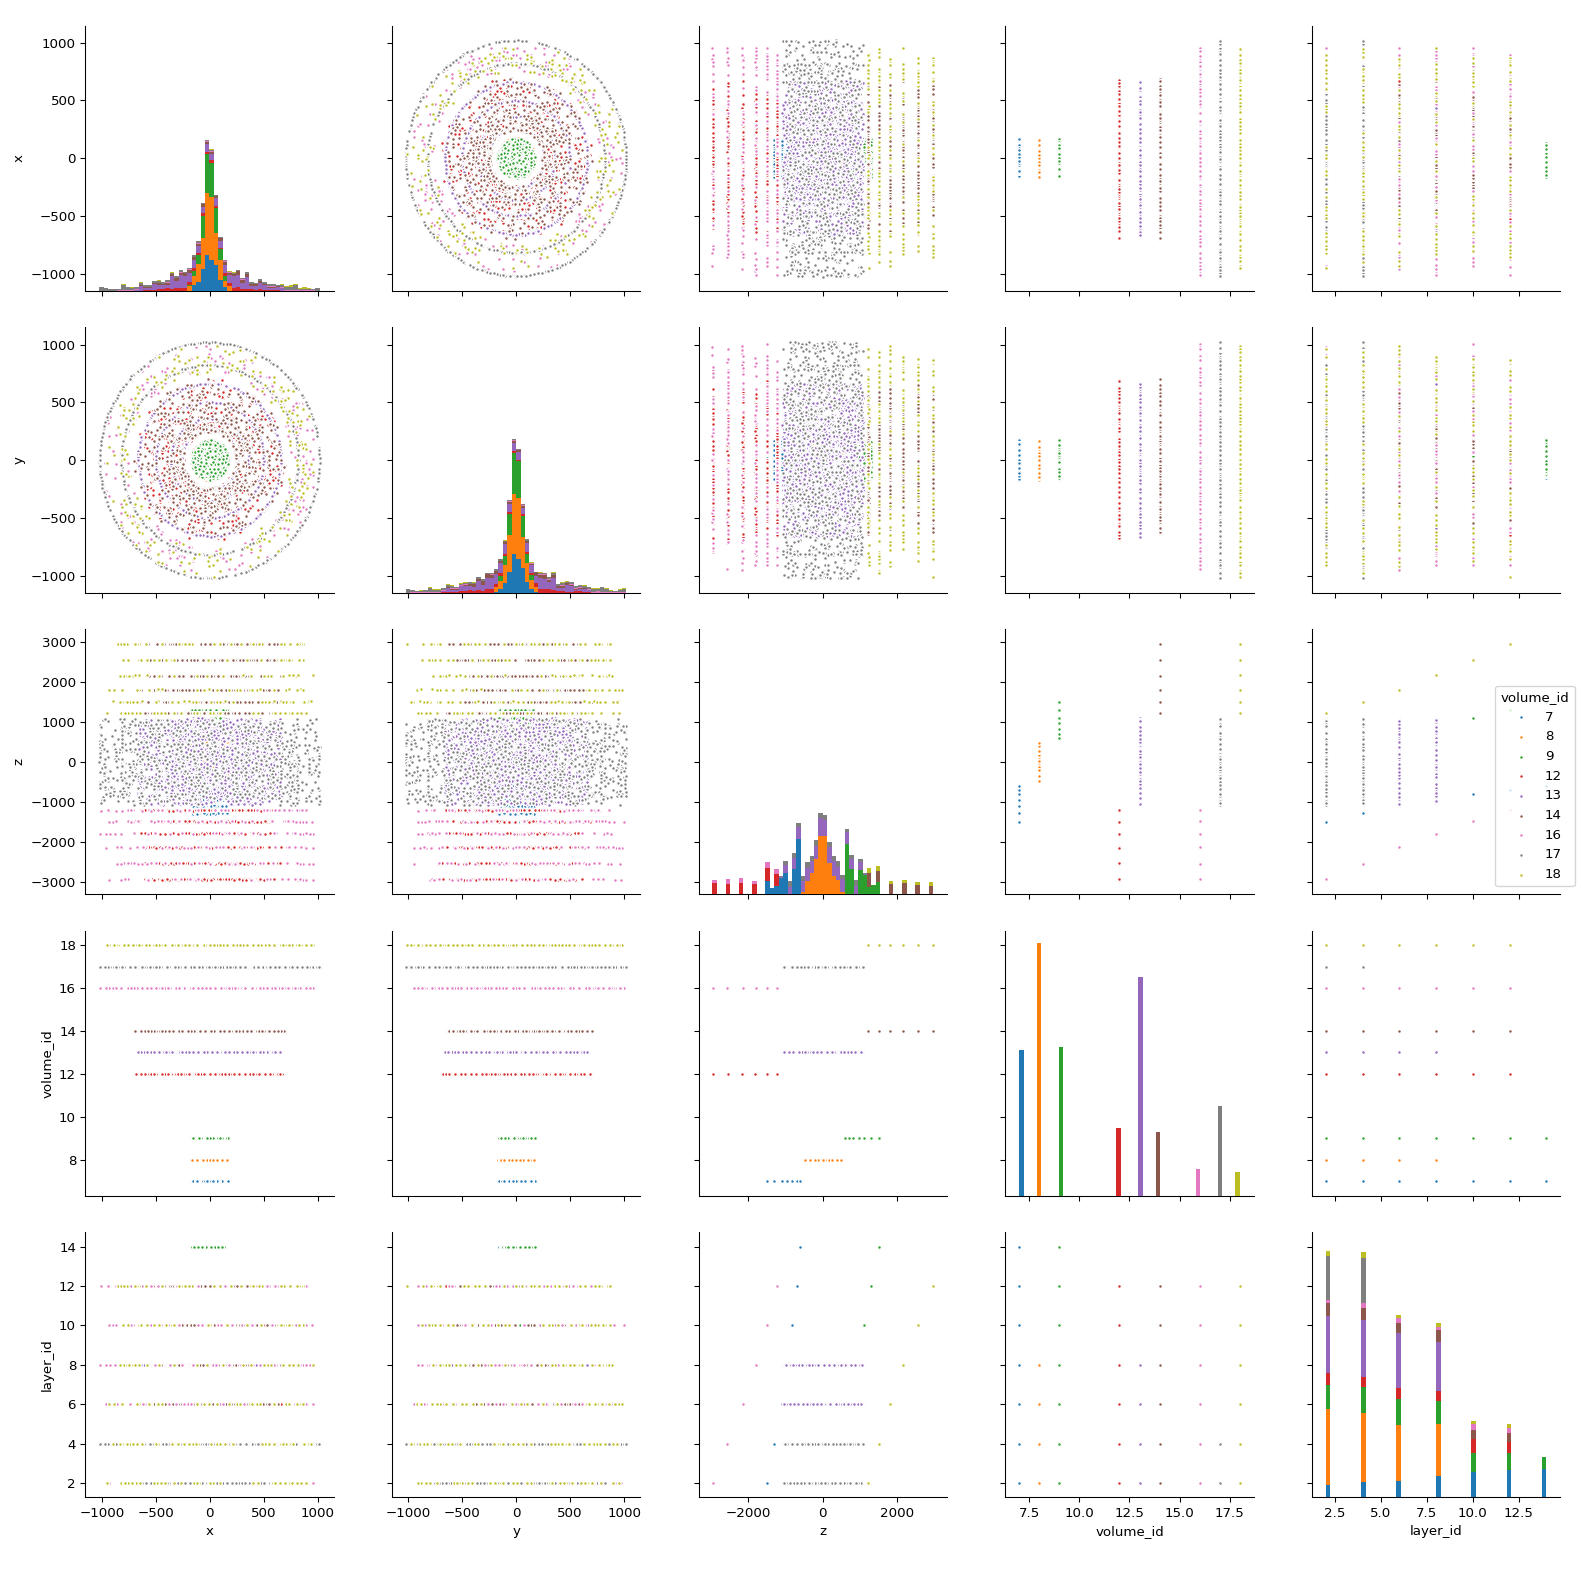

In [8]:
vars_to_plot=list(hits.columns.values)
vars_to_plot.remove('hit_id')
vars_to_plot.remove('module_id')
hits_sample=hits.sample(10000)
sns.pairplot(hits_sample,hue='volume_id',diag_kind='hist',plot_kws={'s':8},diag_kws={'bins':50},vars=vars_to_plot)

In [9]:
cells.head()

,hit_id,ch0,ch1,value
0,1,209,617,0.013832
1,1,210,617,0.079887
2,1,209,618,0.211723
3,2,68,446,0.334087
4,3,58,954,0.034005


In [10]:
cells.describe()

,hit_id,ch0,ch1,value
count,664996.000000,664996.000000,664996.000000,6.649960e+05
mean,49603.957174,211.529248,444.395715,3.560307e-01
std,32415.296519,156.399517,411.081790,4.324583e-01
min,1.000000,0.000000,0.000000,1.461840e-07
25%,25174.000000,97.000000,55.000000,5.364857e-02
50%,36148.000000,191.000000,340.000000,6.512935e-02
75%,78196.000000,287.000000,802.000000,1.000000e+00
max,120939.000000,1195.000000,1279.000000,1.000000e+00


<IPython.core.display.Javascript object>


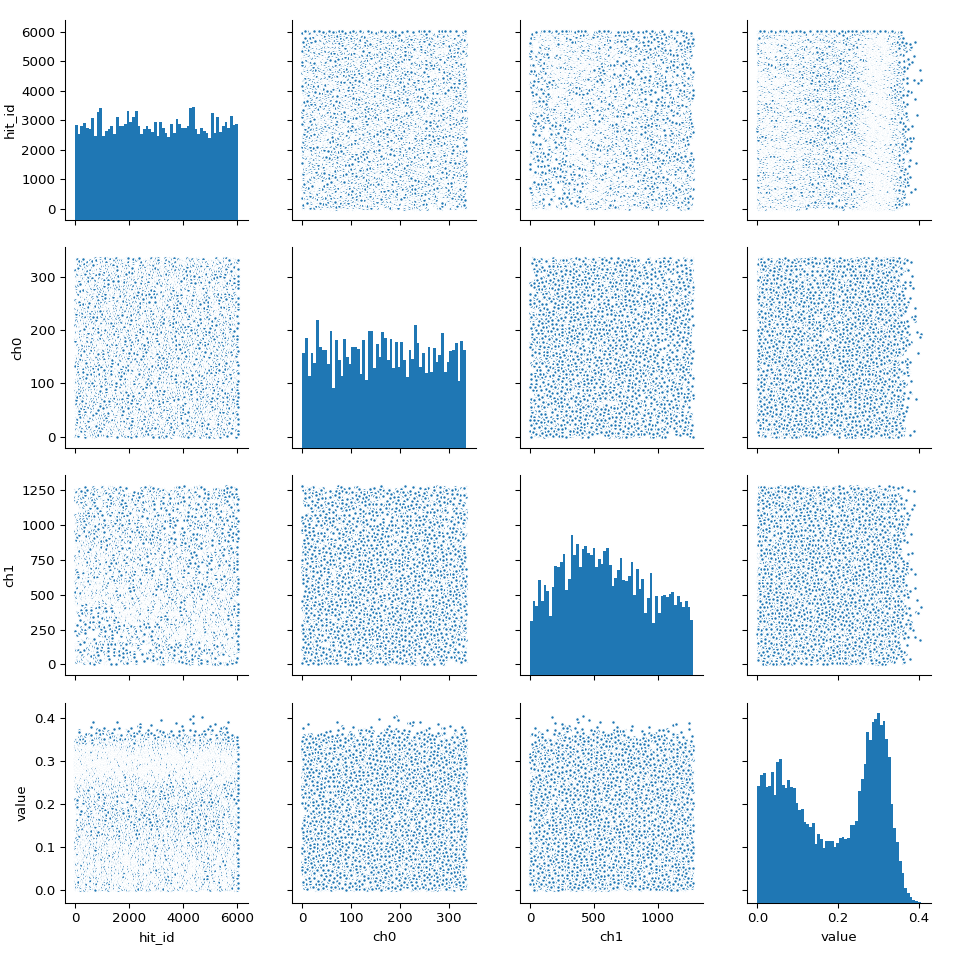

In [11]:
cell_samples=cells[:10000]
sns.pairplot(cell_samples,diag_kind='hist',plot_kws={'s':8},diag_kws={'bins':60}) #no information from this plot really

In [12]:
particles.head()

,particle_id,vx,vy,vz,px,py,pz,q,nhits
0,4503668346847232,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1,8
1,4503737066323968,-0.009288,0.009861,-0.077879,-0.948125,0.470892,2.010060,1,11
2,4503805785800704,-0.009288,0.009861,-0.077879,-0.886484,0.105749,0.683881,-1,0
3,4503874505277440,-0.009288,0.009861,-0.077879,0.257539,-0.676718,0.991616,1,12
4,4503943224754176,-0.009288,0.009861,-0.077879,16.439400,-15.548900,-39.824902,1,3


In [13]:
particles.describe()

,particle_id,vx,vy,vz,px,py,pz,q,nhits
count,1.226300e+04,12263.000000,12263.000000,12263.000000,12263.000000,12263.000000,12263.000000,12263.000000,12263.000000
mean,4.803273e+17,1.107652,0.767732,7.498849,-0.003691,0.000103,0.100067,0.107233,8.424121
std,2.983347e+17,124.103058,124.627594,537.856995,0.930213,0.640033,7.765764,0.994274,5.033464
min,4.503668e+15,-955.513977,-901.664978,-2955.500000,-45.300701,-16.516300,-95.573402,-1.000000,0.000000
25%,2.161771e+17,-0.017552,-0.013040,-5.444660,-0.215898,-0.208301,-0.815998,-1.000000,4.000000
50%,4.548682e+17,0.000457,0.002574,-0.438758,-0.005679,0.006612,0.001188,1.000000,10.000000
75%,7.431018e+17,0.014919,0.013532,6.016730,0.203908,0.215444,0.848551,1.000000,12.000000
max,9.683079e+17,968.200012,980.807007,2950.000000,53.201599,11.169400,459.528015,1.000000,19.000000


<IPython.core.display.Javascript object>


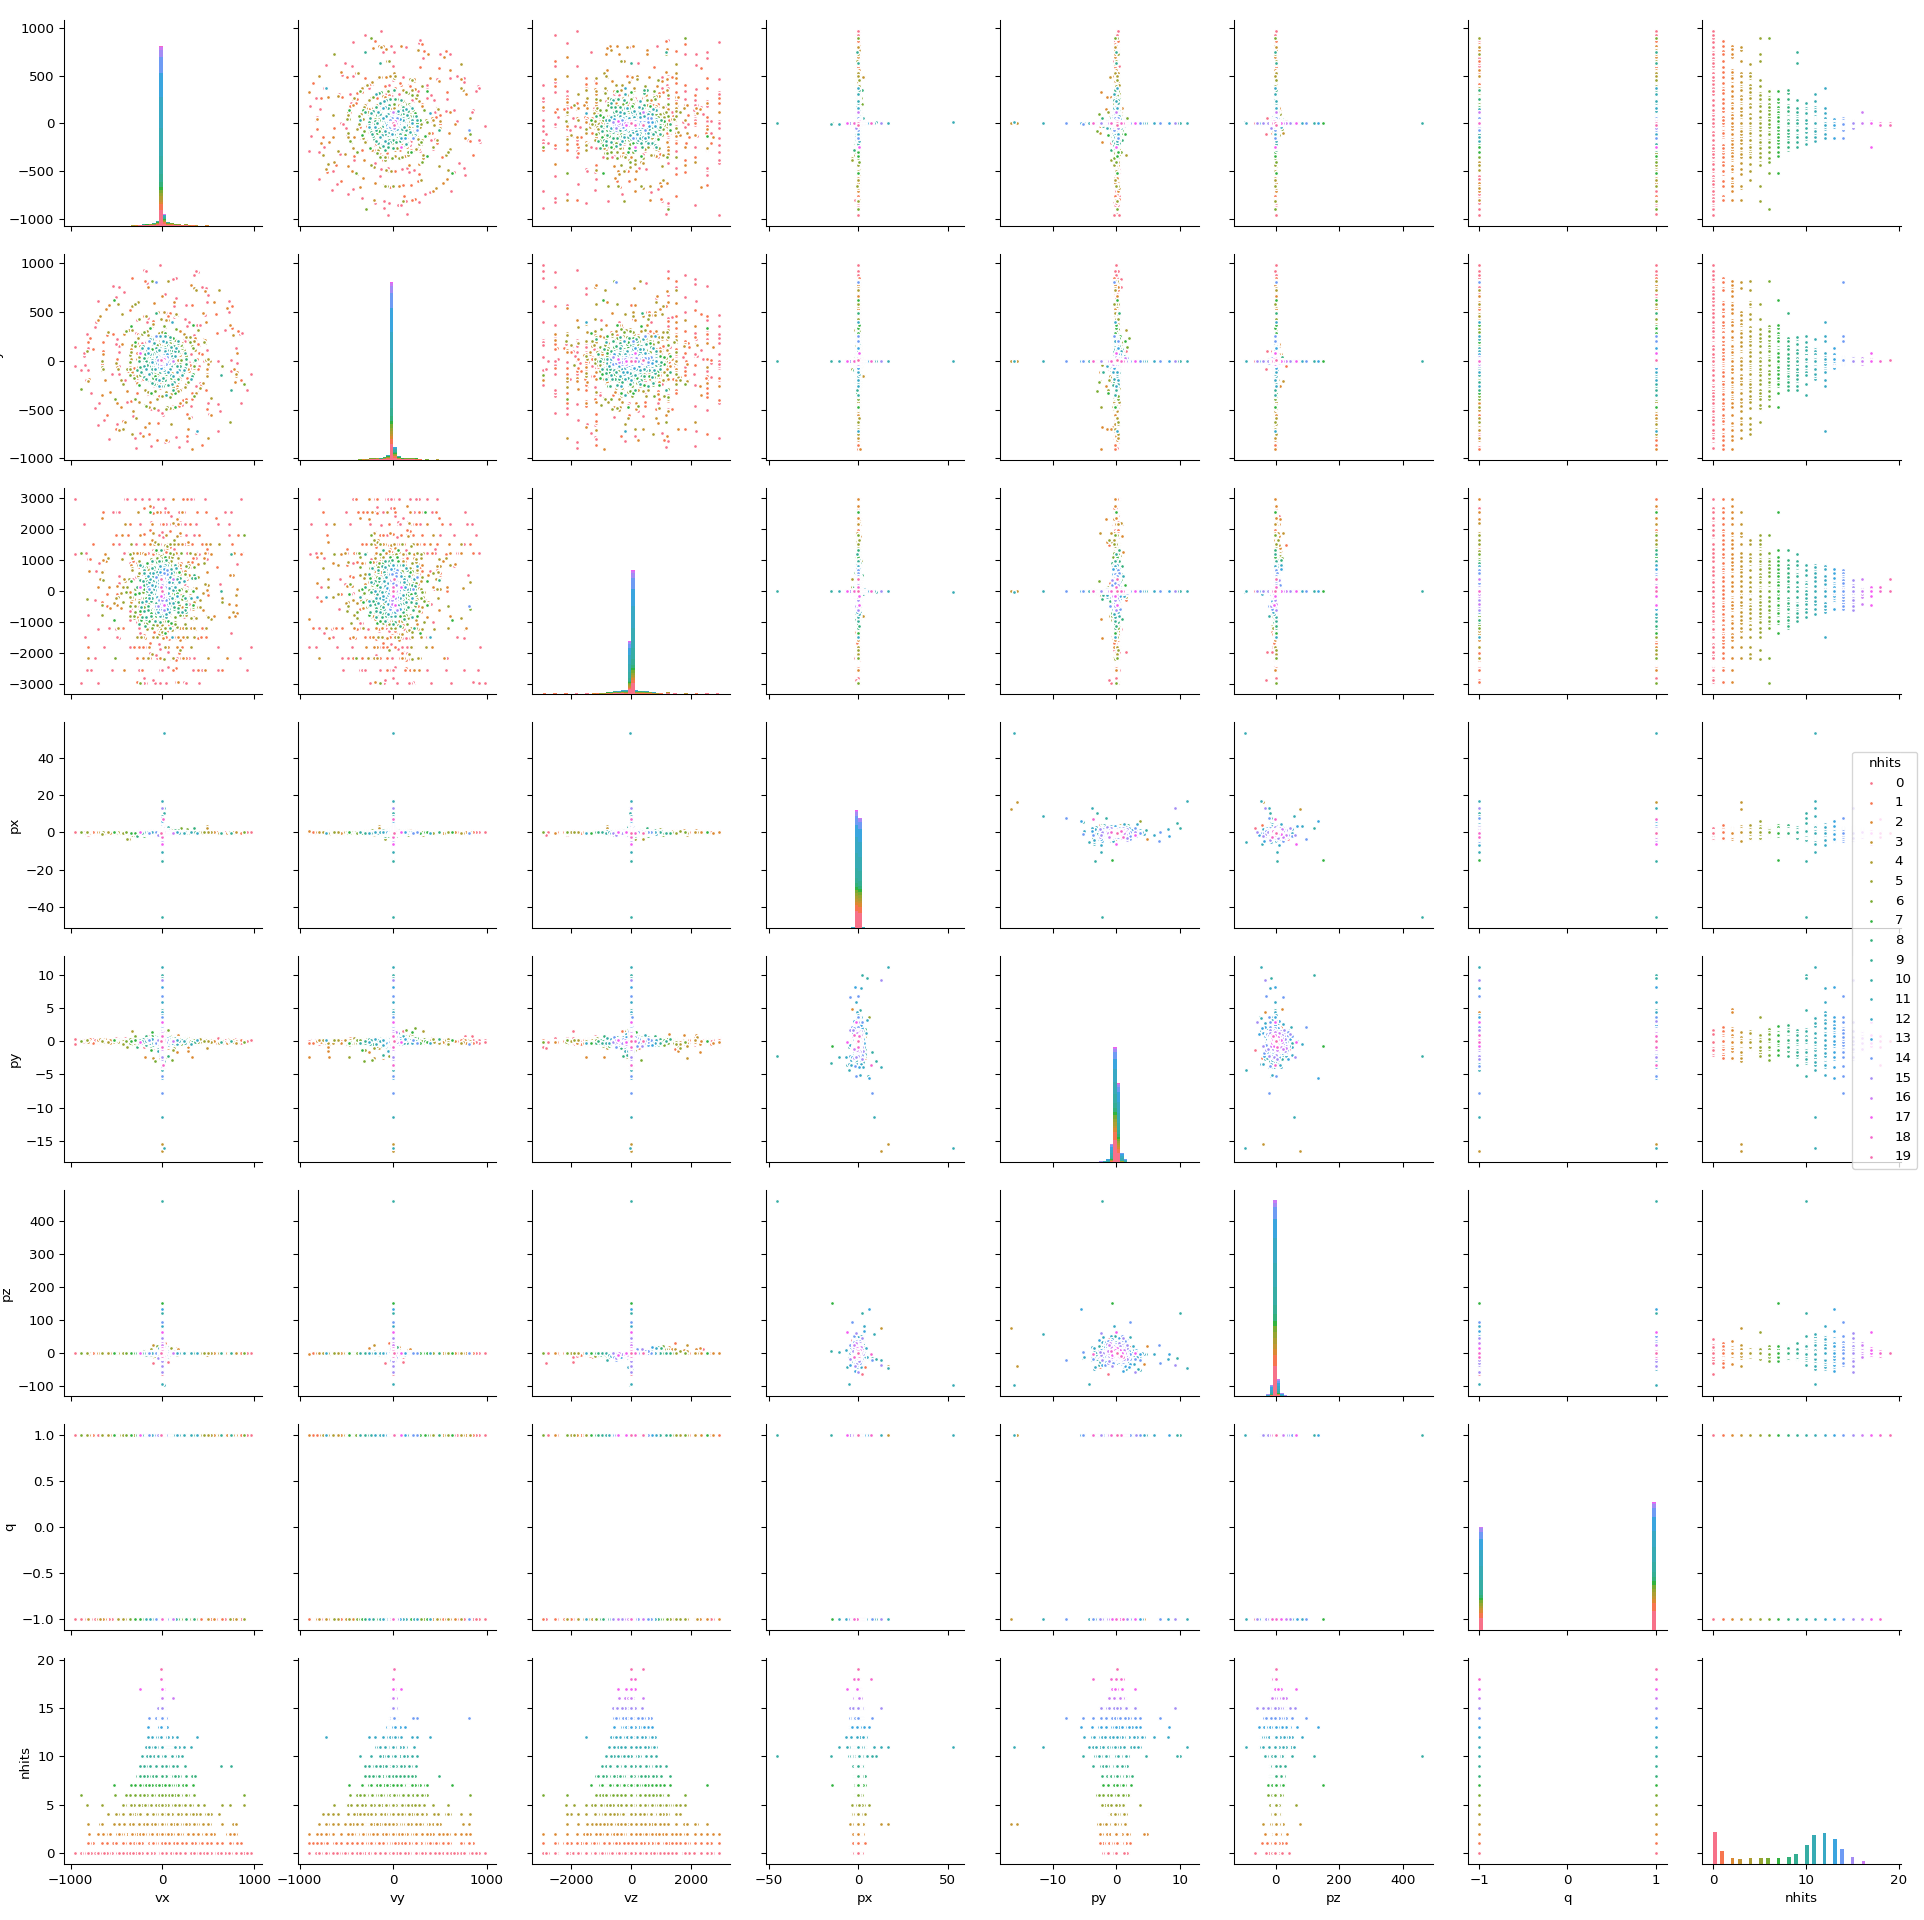

In [14]:
vars_to_plot=list(particles.columns.values)
vars_to_plot.remove('particle_id')
sns.pairplot(particles,hue='nhits',diag_kind='hist',vars=vars_to_plot,plot_kws={'s':9},diag_kws={'bins':50})

In [15]:
truth.head()

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,0,-64.411598,-7.164120,-1502.5,250710.000000,-149908.000000,-956385.00000,0.000000
1,2,22525763437723648,-55.338501,0.630805,-1502.5,-0.570605,0.028390,-15.49220,0.000010
2,3,0,-83.828003,-1.145580,-1502.5,626295.000000,-169767.000000,-760877.00000,0.000000
3,4,297237712845406208,-96.122902,-8.230360,-1502.5,-0.225235,-0.050968,-3.70232,0.000008
4,5,418835796137607168,-62.659401,-9.375040,-1502.5,-0.281806,-0.023487,-6.57318,0.000009


In [16]:
truth.describe()

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
count,120939.00000,1.209390e+05,120939.000000,120939.000000,120939.000000,120939.000000,120939.000000,120939.000000,120939.000000
mean,60470.00000,4.103431e+17,-1.767838,4.754221,-2.310570,-528.416260,437.340668,-17.349043,0.000008
std,34912.22644,3.231682e+17,305.710358,305.167908,1061.912964,188079.859375,189808.328125,272779.312500,0.000008
min,1.00000,0.000000e+00,-1024.839966,-1025.099976,-2955.500000,-999841.000000,-999861.000000,-1000000.000000,0.000000
25%,30235.50000,1.035873e+17,-100.141998,-95.873302,-654.862000,-0.329628,-0.309520,-2.038540,0.000004
50%,60470.00000,3.648081e+17,-1.651420,1.012140,-1.759190,-0.006623,0.006257,-0.007396,0.000007
75%,90704.50000,7.115699e+17,97.251553,103.222000,655.110504,0.308269,0.329654,2.038135,0.000011
max,120939.00000,9.683079e+17,1025.349976,1024.849976,2955.500000,999910.000000,999798.000000,1000000.000000,0.000165


<IPython.core.display.Javascript object>


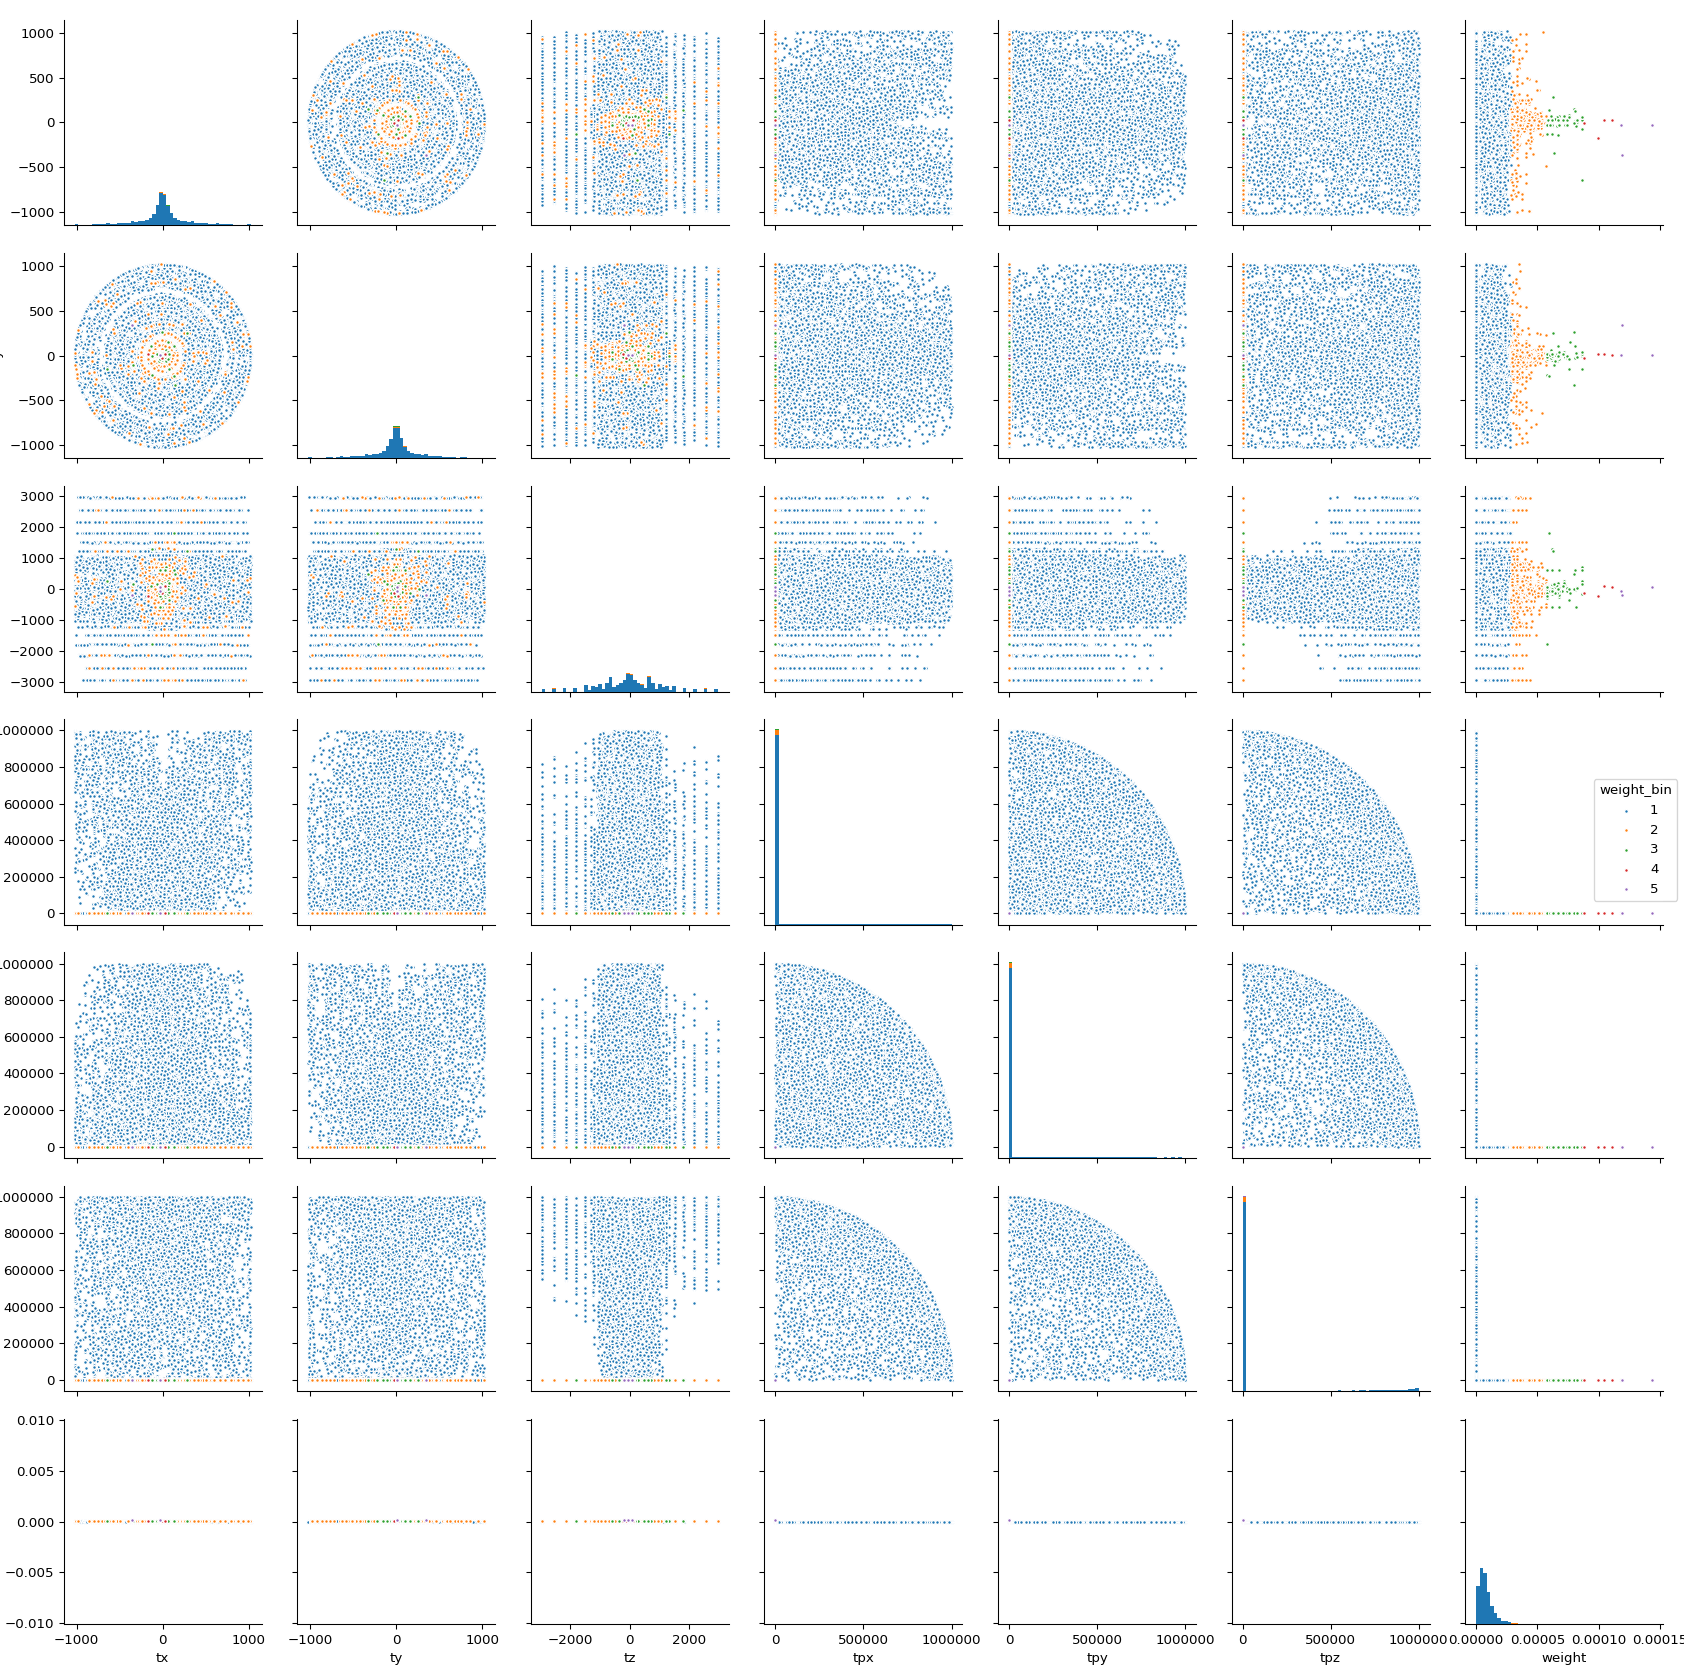

In [30]:
#bin by weight to create color hue
truth['tpx']=np.abs(truth.tpx)
truth['tpy']=np.abs(truth.tpy)
truth['tpz']=np.abs(truth.tpz)
truth_samples=truth.sample(40000)

all_weights=truth_samples.weight
max_weight=all_weights.max()*1.001
min_weight=all_weights.min()
bins=np.linspace(min_weight,max_weight,6)
weight_bins=np.digitize(all_weights,bins)
truth_samples['weight_bin']=weight_bins

vars_to_plot=list(truth_samples.columns.values)
vars_to_plot.remove('hit_id')
vars_to_plot.remove('particle_id')
vars_to_plot.remove('weight_bin')

#plot with noise
sns.pairplot(truth_samples,hue='weight_bin',diag_kind='hist',plot_kws={'s':8},diag_kws={'bins':50},vars=vars_to_plot)

<IPython.core.display.Javascript object>


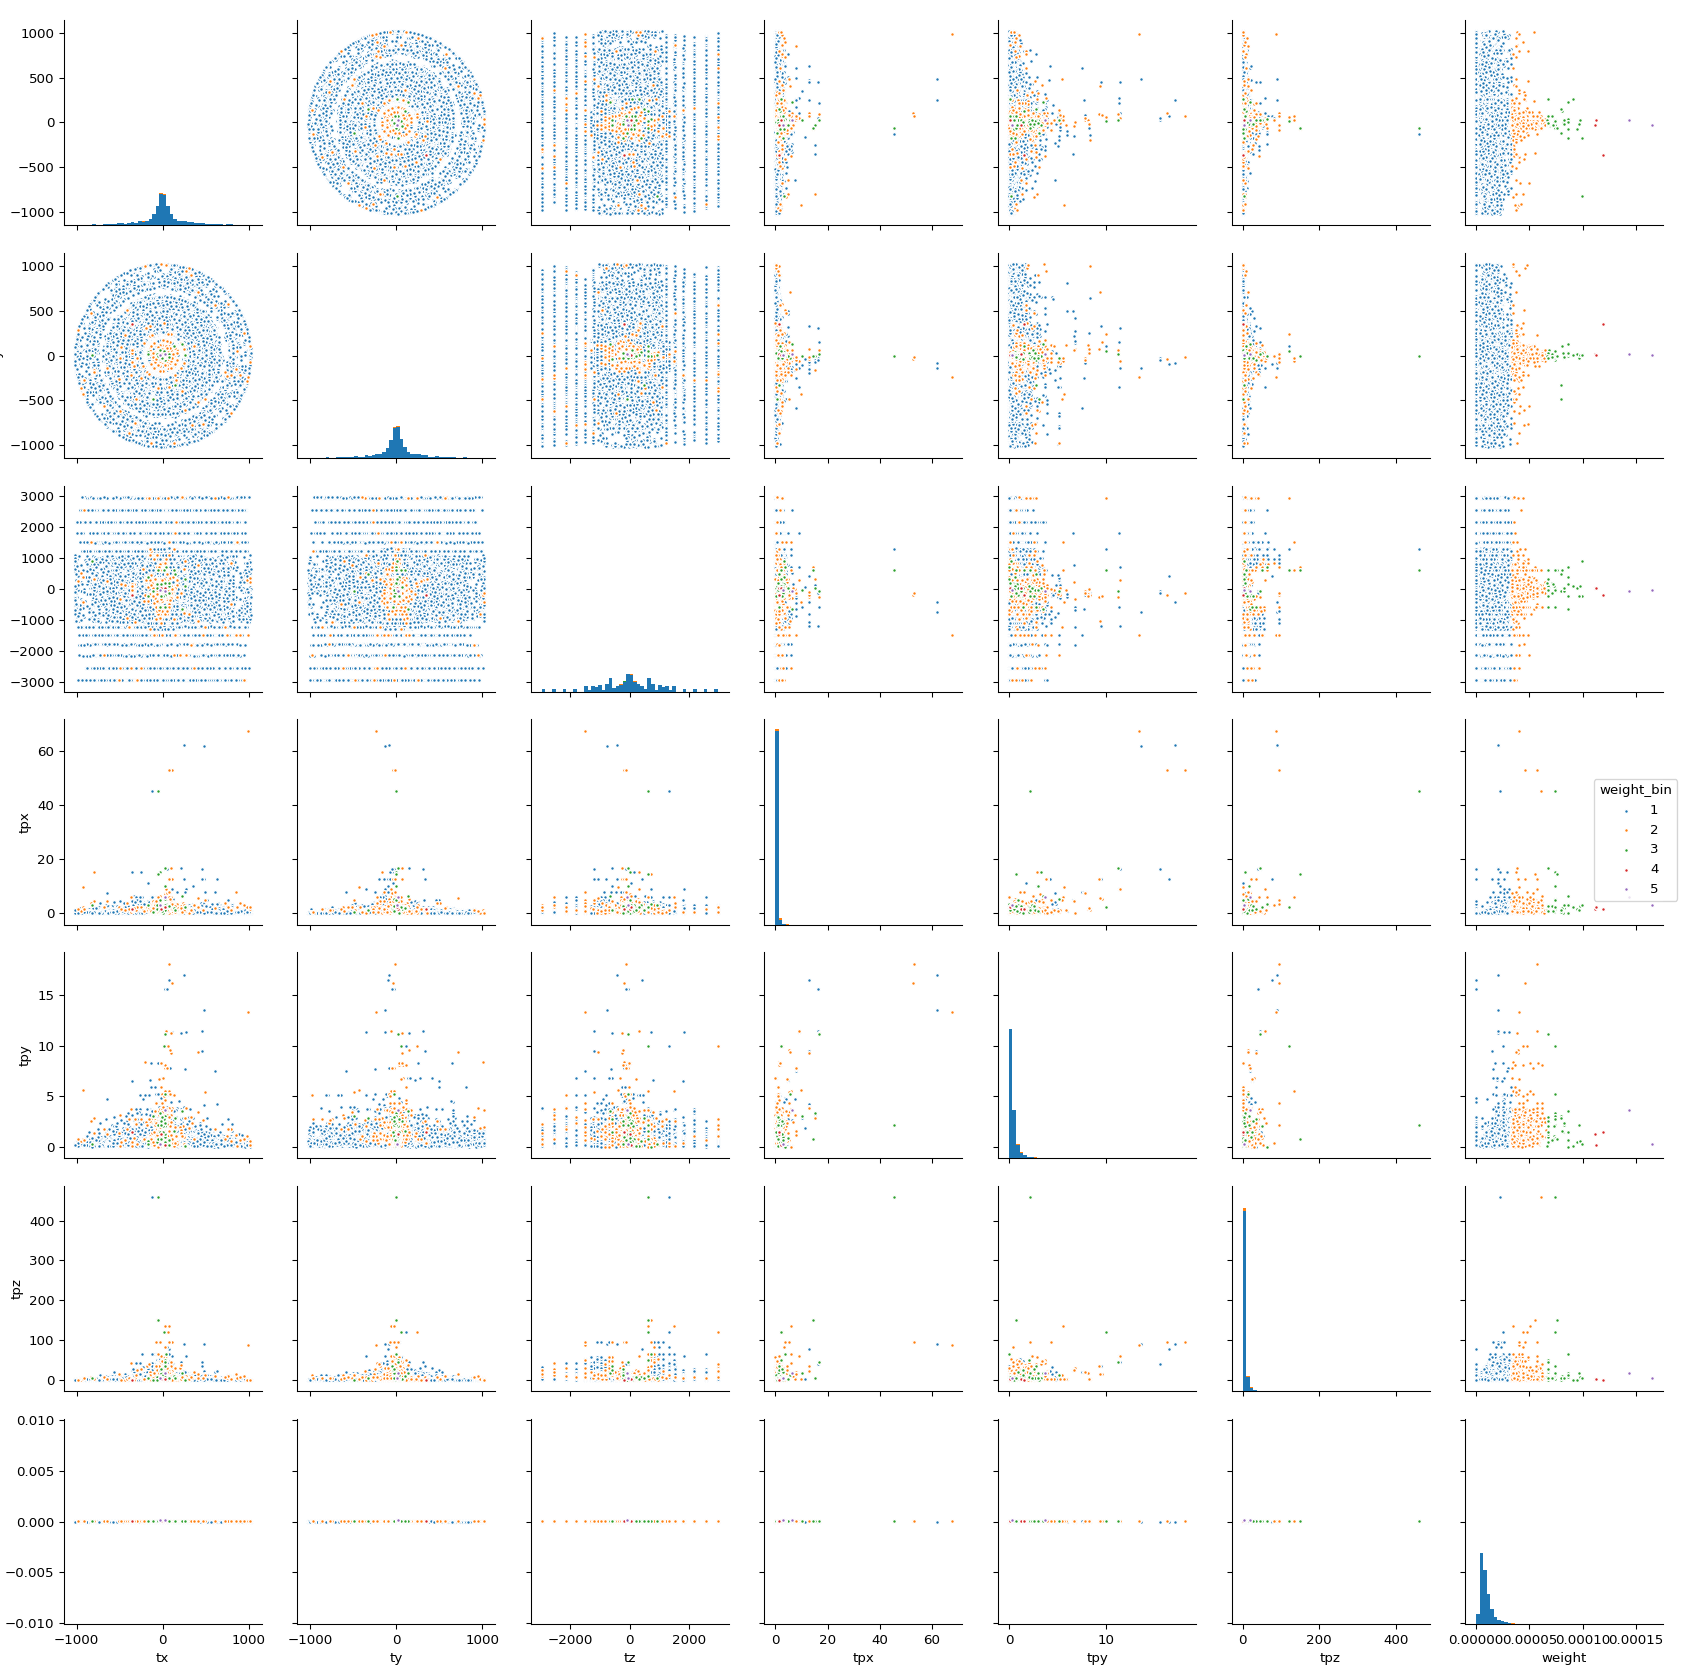

In [28]:
#without noise hits
truth_samples_no_noise=truth_samples[truth_samples.particle_id!=0]
sns.pairplot(truth_samples_no_noise,hue='weight_bin',diag_kind='hist',plot_kws={'s':8},diag_kws={'bins':50},vars=vars_to_plot)

In [31]:
truth_samples_no_noise.describe()

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight,weight_bin
count,34185.000000,3.418500e+04,34185.000000,34185.000000,34185.000000,3.418500e+04,34185.000000,34185.000000,34185.000000,34185.000000
mean,56234.403189,4.790440e+17,-0.249235,3.972740,-5.883117,4.205036e-01,0.404273,3.611741,0.000010,1.019307
std,33751.982433,2.977787e+17,268.639252,268.611511,1066.381592,1.034781e+00,0.577998,7.705015,0.000008,0.150595
min,2.000000,4.503668e+15,-1024.180054,-1023.770020,-2955.500000,6.655010e-07,0.000002,0.000010,0.000000,1.000000
25%,26880.000000,2.161760e+17,-81.646301,-78.249397,-680.620972,1.415160e-01,0.139468,0.355760,0.000005,1.000000
50%,54835.000000,4.548658e+17,-1.096380,1.016110,-2.759390,2.629280e-01,0.265260,1.375000,0.000008,1.000000
75%,84050.000000,7.431031e+17,81.130501,84.329399,646.697021,4.791570e-01,0.484250,4.170140,0.000012,1.000000
max,120933.000000,9.683061e+17,1023.669983,1021.599976,2955.500000,6.746090e+01,18.113600,459.526001,0.000165,5.000000


In [34]:
truth_samples_no_noise[truth_samples_no_noise.weight_bin>2].describe()

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight,weight_bin
count,48.000000,4.800000e+01,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,35524.416667,3.961405e+17,-10.608926,-3.096576,63.208347,4.215338,1.914712,25.434561,0.000083,3.145833
std,23534.919201,3.562834e+17,156.051086,104.716873,327.158539,7.059521,2.185224,70.149002,0.000020,0.460785
min,14331.000000,4.505730e+15,-821.361023,-486.170990,-661.088013,0.070799,0.017773,0.464929,0.000067,3.000000
25%,20091.250000,1.465259e+16,-31.017550,-20.180201,-77.716425,1.478570,0.572963,2.700670,0.000069,3.000000
50%,23705.000000,4.188392e+17,9.666715,3.543655,16.011800,2.328835,1.439745,6.549920,0.000074,3.000000
75%,46531.750000,7.431047e+17,31.387375,18.306700,157.400993,3.273173,2.608280,17.709300,0.000086,3.000000
max,112687.000000,9.547773e+17,257.053009,347.404999,901.150024,45.299999,11.185200,459.526001,0.000165,5.000000


### Clustering

In [4]:
#some helper functions

from sklearn.preprocessing import StandardScaler
from trackml.score import score_event

def preprocess(hits): #cylindrical like transformation
        
    x = hits.x.values
    y = hits.y.values
    z = hits.z.values

    r = np.sqrt(x**2 + y**2 + z**2)
    hits['x2'] = x/r
    hits['y2'] = y/r

    r = np.sqrt(x**2 + y**2)
    hits['z2'] = z/r

    ss = StandardScaler()
    X = ss.fit_transform(hits[['x2', 'y2', 'z2']].values)
        
    return X

def create_one_event_submission(event_id, hits, labels):
    sub_data = np.column_stack(([event_id]*len(hits), hits.hit_id.values, labels))
    submission = pd.DataFrame(data=sub_data, columns=["event_id", "hit_id", "track_id"]).astype(int)
    return submission
          

Start with kmeans, followed by miniBatchkMeans. We expect the number of tracks and consequently the number of clusters to be very high (close to total number of particles above). kmeans doesn't work well when number of clusters is high. miniBatchKmeans can remedy that somewhat. 

In [6]:
from sklearn.cluster import MiniBatchKMeans,KMeans
preprocessed_hits=preprocess(hits)

In [26]:
mb=KMeans(n_clusters=2000,random_state=0,verbose=2)
mb.fit(preprocessed_hits)


Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 401.31247
start iteration
done sorting
end inner loop
Iteration 1, inertia 380.98465
start iteration
done sorting
end inner loop
Iteration 2, inertia 373.45758
start iteration
done sorting
end inner loop
Iteration 3, inertia 368.93637
start iteration
done sorting
end inner loop
Iteration 4, inertia 365.96027
start iteration
done sorting
end inner loop
Iteration 5, inertia 363.86285
start iteration
done sorting
end inner loop
Iteration 6, inertia 362.31104
start iteration
done sorting
end inner loop
Iteration 7, inertia 361.2285
start iteration
done sorting
end inner loop
Iteration 8, inertia 360.37973
start iteration
done sorting
end inner loop
Iteration 9, inertia 359.77295
start iteration
done sorting
end inner loop
Iteration 10, inertia 359.3054
start iteration
done sorting
end inner loop
Iteration 11, inertia 358.94183
start iteration
done sorting
end inner loop
Iteration 12, inertia 358.64767


Iteration 23, inertia 358.66132
start iteration
done sorting
end inner loop
Iteration 24, inertia 358.64218
start iteration
done sorting
end inner loop
Iteration 25, inertia 358.63
start iteration
done sorting
end inner loop
Iteration 26, inertia 358.619
start iteration
done sorting
end inner loop
Iteration 27, inertia 358.60812
start iteration
done sorting
end inner loop
Iteration 28, inertia 358.60312
start iteration
done sorting
end inner loop
Iteration 29, inertia 358.59064
start iteration
done sorting
end inner loop
Iteration 30, inertia 358.57782
start iteration
done sorting
end inner loop
Iteration 31, inertia 358.5692
start iteration
done sorting
end inner loop
Iteration 32, inertia 358.56085
start iteration
done sorting
end inner loop
Iteration 33, inertia 358.5576
start iteration
done sorting
end inner loop
Iteration 34, inertia 358.55524
start iteration
done sorting
end inner loop
Iteration 35, inertia 358.55295
center shift 5.987890e-03 within tolerance 1.000000e-04
Initial

done sorting
end inner loop
Iteration 14, inertia 358.71503
start iteration
done sorting
end inner loop
Iteration 15, inertia 358.4558
start iteration
done sorting
end inner loop
Iteration 16, inertia 358.24014
start iteration
done sorting
end inner loop
Iteration 17, inertia 358.04834
start iteration
done sorting
end inner loop
Iteration 18, inertia 357.90598
start iteration
done sorting
end inner loop
Iteration 19, inertia 357.7901
start iteration
done sorting
end inner loop
Iteration 20, inertia 357.7229
start iteration
done sorting
end inner loop
Iteration 21, inertia 357.68658
start iteration
done sorting
end inner loop
Iteration 22, inertia 357.63776
start iteration
done sorting
end inner loop
Iteration 23, inertia 357.59457
start iteration
done sorting
end inner loop
Iteration 24, inertia 357.5622
start iteration
done sorting
end inner loop
Iteration 25, inertia 357.53745
start iteration
done sorting
end inner loop
Iteration 26, inertia 357.51205
start iteration
done sorting
end

done sorting
end inner loop
Iteration 4, inertia 366.28406
start iteration
done sorting
end inner loop
Iteration 5, inertia 364.34427
start iteration
done sorting
end inner loop
Iteration 6, inertia 362.97968
start iteration
done sorting
end inner loop
Iteration 7, inertia 361.9372
start iteration
done sorting
end inner loop
Iteration 8, inertia 361.08374
start iteration
done sorting
end inner loop
Iteration 9, inertia 360.41348
start iteration
done sorting
end inner loop
Iteration 10, inertia 359.8963
start iteration
done sorting
end inner loop
Iteration 11, inertia 359.46176
start iteration
done sorting
end inner loop
Iteration 12, inertia 359.13147
start iteration
done sorting
end inner loop
Iteration 13, inertia 358.84497
start iteration
done sorting
end inner loop
Iteration 14, inertia 358.60193
start iteration
done sorting
end inner loop
Iteration 15, inertia 358.41757
start iteration
done sorting
end inner loop
Iteration 16, inertia 358.27066
start iteration
done sorting
end inn

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2000, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=2)

In [33]:
kmeans_labels=mb.labels_
kmeans_solution = create_one_event_submission(0, hits, kmeans_labels)
kmeans_score = score_event(truth, kmeans_solution)
print(kmeans_score)

6.0664056014211e-05


That did very very badly. For fun, let's see how does it compare to random assignment

In [40]:
from trackml.randomize import shuffle_hits

shuffled = shuffle_hits(truth, 0.85) # 15% probability to reassign a hit
score = score_event(truth, shuffled)
print(score)

4.907196213569488e-05


It appears 85% of the hits randomly assigned does a little bit better, in fact. Lets switch to miniBatchkMeans, so we can increase the number of clusters without having to wait forever.

In [42]:
mb=MiniBatchKMeans(n_clusters=10000,random_state=0,verbose=2,batch_size=50000,init='random')
mb.fit(preprocessed_hits)

Init 1/3 with method: random
Inertia for init 1/3: 100.925385
Init 2/3 with method: random
Inertia for init 2/3: 95.158727
Init 3/3 with method: random
Inertia for init 3/3: 99.502696
Minibatch iteration 1/300: mean batch inertia: 0.000863, ewa inertia: 0.000863 
Minibatch iteration 2/300: mean batch inertia: 0.000837, ewa inertia: 0.000842 
Minibatch iteration 3/300: mean batch inertia: 0.000815, ewa inertia: 0.000820 
Minibatch iteration 4/300: mean batch inertia: 0.000788, ewa inertia: 0.000793 
Minibatch iteration 5/300: mean batch inertia: 0.000773, ewa inertia: 0.000777 
Minibatch iteration 6/300: mean batch inertia: 0.000767, ewa inertia: 0.000769 
Minibatch iteration 7/300: mean batch inertia: 0.000744, ewa inertia: 0.000748 
Minibatch iteration 8/300: mean batch inertia: 0.000734, ewa inertia: 0.000736 
Minibatch iteration 9/300: mean batch inertia: 0.000743, ewa inertia: 0.000741 
Minibatch iteration 10/300: mean batch inertia: 0.000742, ewa inertia: 0.000742 
Minibatch itera

MiniBatchKMeans(batch_size=50000, compute_labels=True, init='random',
        init_size=None, max_iter=100, max_no_improvement=10,
        n_clusters=10000, n_init=3, random_state=0,
        reassignment_ratio=0.01, tol=0.0, verbose=2)

In [44]:
mb_kmeans_labels=mb.labels_
mb_kmeans_solution = create_one_event_submission(0, hits, mb_kmeans_labels)
mb_kmeans_score = score_event(truth, mb_kmeans_solution)
print(mb_kmeans_score)

0.15737324175039502


That's much better. Lets, try increasing number of clusters

In [47]:
mb_2=MiniBatchKMeans(n_clusters=20000,random_state=0,verbose=1,batch_size=60000,init='random')
mb_2.fit(preprocessed_hits)

Init 1/3 with method: random
Inertia for init 1/3: 41.434366
Init 2/3 with method: random
Inertia for init 2/3: 37.732489
Init 3/3 with method: random
Inertia for init 3/3: 40.861409
Minibatch iteration 1/300: mean batch inertia: 0.000385, ewa inertia: 0.000385 
Minibatch iteration 2/300: mean batch inertia: 0.000360, ewa inertia: 0.000360 
Minibatch iteration 3/300: mean batch inertia: 0.000342, ewa inertia: 0.000342 
Minibatch iteration 4/300: mean batch inertia: 0.000330, ewa inertia: 0.000330 
Minibatch iteration 5/300: mean batch inertia: 0.000326, ewa inertia: 0.000326 
Minibatch iteration 6/300: mean batch inertia: 0.000315, ewa inertia: 0.000315 
Minibatch iteration 7/300: mean batch inertia: 0.000316, ewa inertia: 0.000316 
Minibatch iteration 8/300: mean batch inertia: 0.000312, ewa inertia: 0.000312 
Minibatch iteration 9/300: mean batch inertia: 0.000309, ewa inertia: 0.000309 
[MiniBatchKMeans] Reassigning 55 cluster centers.
Minibatch iteration 10/300: mean batch inertia:

MiniBatchKMeans(batch_size=60000, compute_labels=True, init='random',
        init_size=None, max_iter=100, max_no_improvement=10,
        n_clusters=20000, n_init=3, random_state=0,
        reassignment_ratio=0.01, tol=0.0, verbose=1)

In [49]:
mb2_kmeans_labels=mb_2.labels_
mb2_kmeans_solution = create_one_event_submission(0, hits, mb2_kmeans_labels)
mb2_kmeans_score = score_event(truth, mb2_kmeans_solution)
print(mb2_kmeans_score)

0.1530778854511139


No better really. Lets move on to other scalable clustering algos. Still just playing with naive algos. Agglomerative clustering, needs connectivity matrix to be scalable.

In [12]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
knn_graph = kneighbors_graph(hits, 100, include_self=False)

In [ ]:
aggClust=AgglomerativeClustering(n_clusters=10000,connectivity=knn_graph)
aggClust.fit(preprocessed_hits)

In [11]:
from trackml.score import score_event
agg_labels=aggClust.labels_

agg_solution = create_one_event_submission(0, hits, agg_labels)
agg_score = score_event(truth, agg_solution)
print(agg_score)

0.000169938062878883


Not good. To do better it needs to look at many more neighbors before making clusters. Incresing the size of the connectivity graph is taking way too long. Doesn't appear to feasible even with big connectivity matrices

In [10]:
from sklearn.cluster import Birch
birchClust=Birch(threshold=0.05, branching_factor=25, n_clusters=None)
birchClust.fit(preprocessed_hits)

Birch(branching_factor=25, compute_labels=True, copy=True, n_clusters=None,
   threshold=0.05)

In [11]:
birch_labels=birchClust.labels_

birch_solution = create_one_event_submission(0, hits, birch_labels)
birch_score = score_event(truth, birch_solution)
print(birch_score)

0.009945323612807195


Not feasible computationally either. The threshold needs to go much further down than 0.05 to be able to get semi-competitive store. Let's try to reproduce the DBSCAN benchmark from the organizers.

In [24]:
from sklearn.cluster import DBSCAN
DBSCAN_clust=DBSCAN(eps=0.007,min_samples=1)
DBSCAN_clust.fit(preprocessed_hits)

DBSCAN(algorithm='auto', eps=0.007, leaf_size=30, metric='euclidean',
    min_samples=1, n_jobs=1, p=None)

In [25]:
dbs_labels=DBSCAN_clust.labels_

dbs_solution = create_one_event_submission(0, hits, dbs_labels)
dbs_score = score_event(truth, dbs_solution)
print(dbs_score)

0.20442166478185592


Definitely, the quickest and best naive clustering option. Lets look at an average of 20 events.

In [27]:
dataset_scores = []
from trackml.dataset import load_dataset
for event_id, hits, cells, particles, truth in load_dataset(path_to_data, nevents=20):
        
    # Track pattern recognition
    preprocessed_hits=preprocess(hits)
    model = DBSCAN(eps=0.007,min_samples=1)
    labels = model.fit_predict(preprocessed_hits)
        
    # Prepare submission for an event
    curr_solution = create_one_event_submission(event_id, hits, labels)

    # Score for the event
    score = score_event(truth, curr_solution)
    dataset_scores.append(score)
    
    print("Score for event %d: %.3f" % (event_id, score))
    
print('Mean score: %.3f' % (np.mean(dataset_scores)))

Score for event 1000: 0.204
Score for event 1001: 0.205
Score for event 1002: 0.186
Score for event 1003: 0.214
Score for event 1004: 0.201
Score for event 1005: 0.201
Score for event 1006: 0.199
Score for event 1007: 0.207
Score for event 1008: 0.207
Score for event 1009: 0.205
Score for event 1010: 0.199
Score for event 1011: 0.197
Score for event 1012: 0.211
Score for event 1013: 0.210
Score for event 1014: 0.192
Score for event 1015: 0.200
Score for event 1016: 0.208
Score for event 1017: 0.195
Score for event 1018: 0.213
Score for event 1019: 0.187
Mean score: 0.202


0.2 is the benchmark score from organizers. End of starting step.